In [2]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Load the Dataset

d1 = pd.read_csv('data/outlier_1d.txt', header = None)
d2 = pd.read_csv('data/outlier_2d.txt', header = None, sep = " ")
d3 = pd.read_csv('data/outlier_curve.txt', header = None, sep = " ")

In [18]:
d1.shape, d2.shape, d3.shape

((1010, 1), (1010, 2), (1000, 2))

In [19]:
d1.head()

,0
0,21.345
1,20.200
2,14.346
3,15.251
4,20.719


In [20]:
d2.head()

,0,1
0,12.486,19.387
1,8.184,23.854
2,12.195,14.544
3,9.229,19.819
4,11.274,22.953


In [21]:
d3.head()

,0,1
0,0.00,1.415
1,0.01,2.666
2,0.02,2.377
3,0.03,0.583
4,0.04,1.446


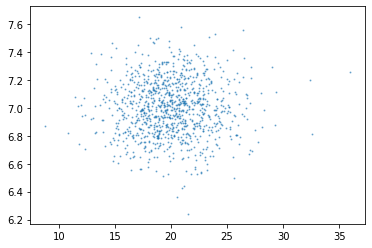

In [22]:
# Plot for D1

plt.scatter(d1, np.random.normal(loc = 7, scale = 0.2, size = d1.size), s = 1, alpha= 0.5)

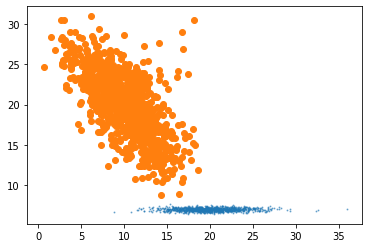

In [25]:
# Plot for D1 & D2

# We fill for X, y
plt.scatter(d1, np.random.normal(loc = 7, scale = 0.2, size = d1.size), s = 1, alpha= 0.5)
plt.scatter(d2.iloc[:,0], d2.iloc[:,1])
plt.show();

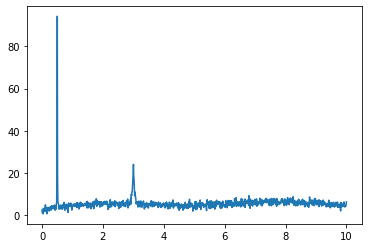

In [27]:
# Plot for D3

plt.plot(d3.iloc[:, 0], d3.iloc[:, 1]);

In [28]:
# We have 10 outlier Data points for all 3 datasets. We perform Outlier Detection here
# We can Model the Data as some Analytics Distribution (Gaussian)

The Mean is [19.93955644] and Standard Deviation is [3.12188318]
 The Z Score value of First 3 Observations is:
 [[0.45019095]
 [0.08342515]
 [1.79172509]]
Rejection [5] points
Z Score of 3 Corresponds to a prob of 0.27%


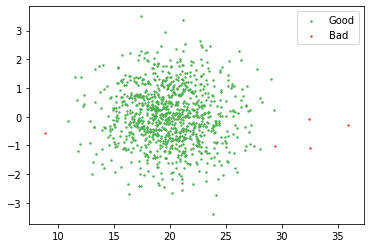

In [72]:
# Perform Outlier Detection for D1 - 1 Dimensional Data

mean, std = np.mean(d1), np.std(d1)
print("The Mean is {a} and Standard Deviation is {b}".format(a = mean.values, b = std.values))

z_score = np.abs((d1 - mean) / std)
print(" The Z Score value of First 3 Observations is:\n {}".format(z_score.values[:3]))

threshold = 3

good = z_score < threshold

# Now we perform Visualisation

print("Rejection {} points".format((~good).sum().values))

# Use Statistics

from scipy.stats import norm

print("Z Score of 3 Corresponds to a prob of {}%".format(round(100*2*norm.sf(threshold), 2)))

# Create a Scatter

visual_scatter = np.random.normal(size = d1.size)
plt.scatter(d1[good], visual_scatter, s = 2, label = "Good", color = "#4CAF50")
plt.scatter(d1[~ good], visual_scatter, s = 2, label = "Bad", color = "#F44336")
plt.legend();
plt.show();

The Mean is [10.07785149 20.00855941] and the Covariance is [[ 9.32815194 -7.67865924]
 [-7.67865924 15.00417802]] for First 5 Observation


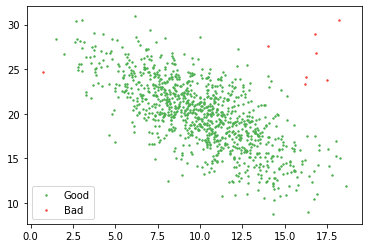

In [104]:
# Perform Outlier Detection for D2 - 2 Dimensional Data

from scipy.stats import multivariate_normal as mn

mean, cov = np.mean(d2, axis = 0), np.cov(d2.T)
print("The Mean is {} and the Covariance is {} for First 5 Observation".format(mean[:5].values, cov[:5]))

# Create a Boolean, whether True or False. Change this to see Graph Change
good = mn(mean,cov).pdf(d2) > 0.01/100

# Plot the Values

plt.scatter(d2[good][0], d2[good][1], s = 2, label = "Good", color = '#4CAF50')
plt.scatter(d2[~ good][0], d2[~ good][1], s = 2, label = "Bad", color = '#F44336')
plt.legend();
plt.show();

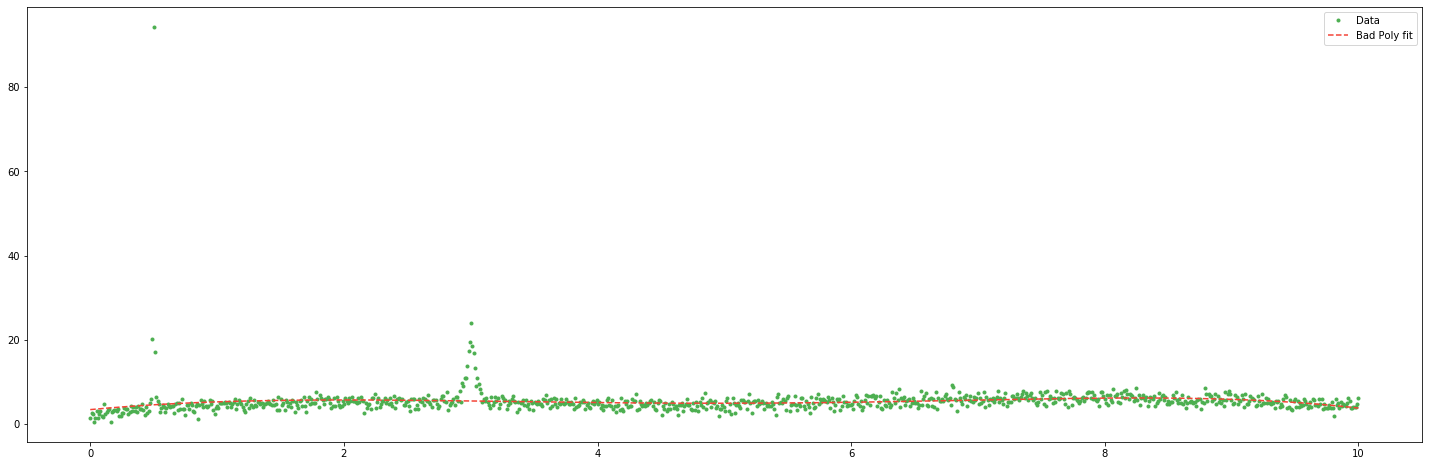

In [152]:
# We couldnt shape with Polynomial, We need to Remove Data Spikes to get polynomial Model

xs = d3.T.iloc[:1, :].values[0]
ys = d3.T.iloc[1:, :].values[0]

p = np.polyfit(xs, ys, deg= 5)
ps = np.polyval(p, xs)

# Plot the Values

plt.figure(figsize = (25, 8))
plt.plot(xs, ys, '.', label = "Data", color = '#4CAF50');
plt.plot(xs, ps, '--',label = "Bad Poly fit", color = '#F44336');
plt.legend();

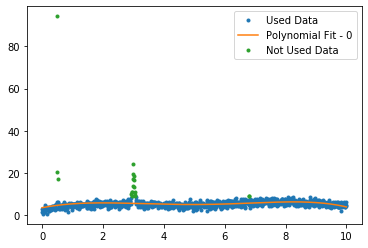

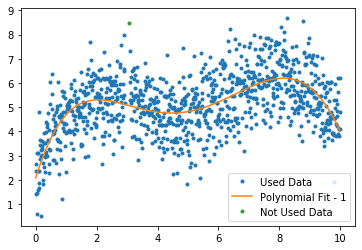

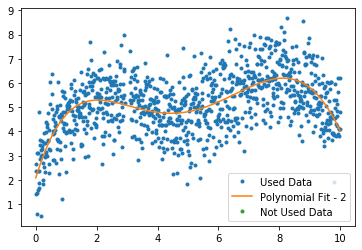

In [158]:
# Now we Remove the Above Outliers and Perform this again. We Reject Polynomial Fitting Iteratively, by removing far data(3 sigma)

x, y = xs.copy(), ys.copy()

for i in range(5):
    p = np.polyfit(x, y, deg = 5)
    ps = np.polyval(p, x)
    
    good = y - ps < 3 # We remove only Positive Outliers
    
    x_bad, y_bad = x[~ good], y[~ good]
    x, y = x[good], y[good]
    
    # Plot the Values
    plt.plot(x, y, '.', label = "Used Data");
    plt.plot(x, np.polyval(p, x), label = "Polynomial Fit - {}".format(i));
    plt.plot(x_bad, y_bad, '.', label = "Not Used Data");
    plt.legend();
    plt.show();
    
    if (~ good).sum() == 0:
        break

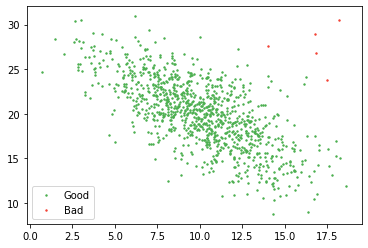

In [170]:
# Automating the Outlier Detection - Try for 2D data

from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors= 20, contamination= 0.004)

good = lof.fit_predict(d2) > 0.5

# Plot the Values

plt.scatter(d2[good][0], d2[good][1], s = 2, label = "Good", color = '#4CAF50')
plt.scatter(d2[~ good][0], d2[~ good][1], s = 2, label = "Bad", color = '#F44336')
plt.legend();
plt.show();

## Thanks